In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: TOT
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


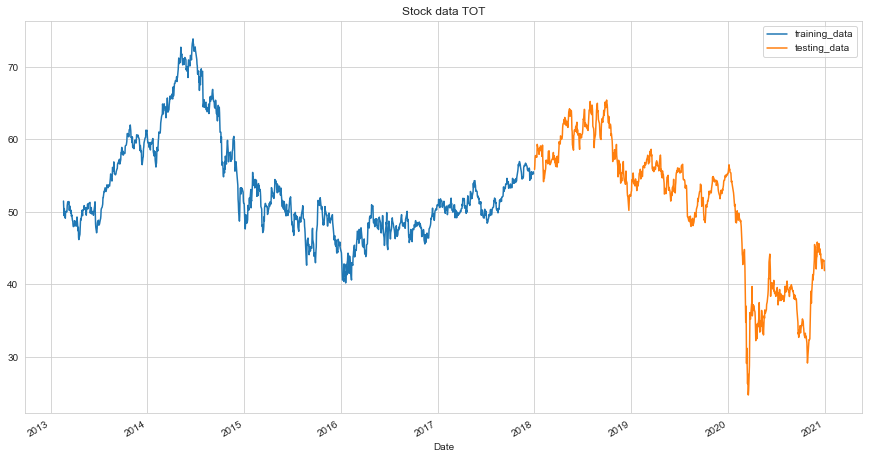

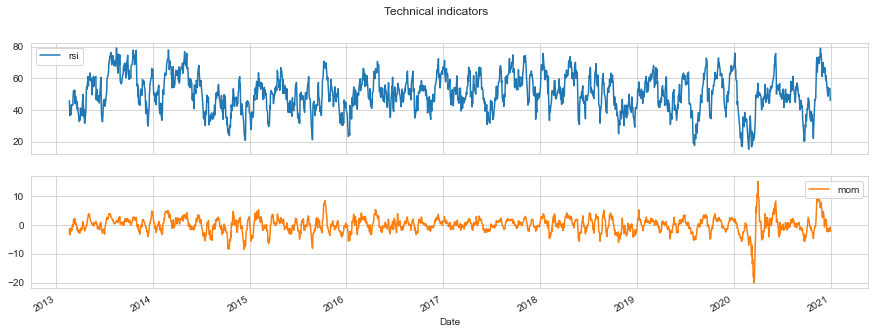

In [10]:
stock_name = 'tot'.upper()
industry = 'Energy'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1134.62, duration: 0:00:00.563126
episode: 2/2000, episode end value: 1115.31, duration: 0:00:00.475106
episode: 3/2000, episode end value: 1118.39, duration: 0:00:00.487110
episode: 4/2000, episode end value: 1116.78, duration: 0:00:00.453102
episode: 5/2000, episode end value: 1111.37, duration: 0:00:00.480108
episode: 6/2000, episode end value: 1118.92, duration: 0:00:00.359079
episode: 7/2000, episode end value: 1108.43, duration: 0:00:00.420095
episode: 8/2000, episode end value: 1110.73, duration: 0:00:00.443099
episode: 9/2000, episode end value: 1115.35, duration: 0:00:00.347079
episode: 10/2000, episode end value: 1108.67, duration: 0:00:00.414093
episode: 11/2000, episode end value: 1111.83, duration: 0:00:00.380087
episode: 12/2000, episode end value: 1103.66, duration: 0:00:00.363081
episode: 13/2000, episode end value: 1104.05, duration: 0:00:00.432098
episode: 14/2000, episode end value: 1100.92, duration: 0:00:00.444100
episode: 15/200

episode: 117/2000, episode end value: 1109.56, duration: 0:00:00.498974
episode: 118/2000, episode end value: 1110.50, duration: 0:00:00.452132
episode: 119/2000, episode end value: 1103.93, duration: 0:00:00.469093
episode: 120/2000, episode end value: 1100.62, duration: 0:00:00.441102
episode: 121/2000, episode end value: 1105.75, duration: 0:00:00.440101
episode: 122/2000, episode end value: 1102.86, duration: 0:00:00.402095
episode: 123/2000, episode end value: 1096.53, duration: 0:00:00.452103
episode: 124/2000, episode end value: 1101.42, duration: 0:00:00.474106
episode: 125/2000, episode end value: 1104.76, duration: 0:00:00.481450
episode: 126/2000, episode end value: 1103.38, duration: 0:00:00.465781
episode: 127/2000, episode end value: 1103.50, duration: 0:00:00.452099
episode: 128/2000, episode end value: 1103.14, duration: 0:00:00.496112
episode: 129/2000, episode end value: 1094.04, duration: 0:00:00.453104
episode: 130/2000, episode end value: 1094.28, duration: 0:00:00

episode: 231/2000, episode end value: 1101.19, duration: 0:00:00.438100
episode: 232/2000, episode end value: 1096.73, duration: 0:00:00.477109
episode: 233/2000, episode end value: 1099.59, duration: 0:00:00.425096
episode: 234/2000, episode end value: 1137.39, duration: 0:00:00.444100
episode: 235/2000, episode end value: 1100.85, duration: 0:00:00.435099
episode: 236/2000, episode end value: 1096.16, duration: 0:00:00.427096
episode: 237/2000, episode end value: 1096.30, duration: 0:00:00.457101
episode: 238/2000, episode end value: 1127.39, duration: 0:00:00.426101
episode: 239/2000, episode end value: 1095.58, duration: 0:00:00.391089
episode: 240/2000, episode end value: 1093.10, duration: 0:00:00.422097
episode: 241/2000, episode end value: 1099.11, duration: 0:00:00.434100
episode: 242/2000, episode end value: 1091.18, duration: 0:00:00.469108
episode: 243/2000, episode end value: 1098.86, duration: 0:00:00.425101
episode: 244/2000, episode end value: 1094.80, duration: 0:00:00

episode: 345/2000, episode end value: 1096.98, duration: 0:00:00.485269
episode: 346/2000, episode end value: 1130.65, duration: 0:00:00.493640
episode: 347/2000, episode end value: 1096.90, duration: 0:00:00.429096
episode: 348/2000, episode end value: 1097.53, duration: 0:00:00.461102
episode: 349/2000, episode end value: 1092.59, duration: 0:00:00.519117
episode: 350/2000, episode end value: 1105.35, duration: 0:00:00.516117
episode: 351/2000, episode end value: 1108.24, duration: 0:00:00.481110
episode: 352/2000, episode end value: 1106.62, duration: 0:00:00.509112
episode: 353/2000, episode end value: 1091.61, duration: 0:00:00.479107
episode: 354/2000, episode end value: 1094.13, duration: 0:00:00.479106
episode: 355/2000, episode end value: 1097.11, duration: 0:00:00.507625
episode: 356/2000, episode end value: 1102.81, duration: 0:00:00.552649
episode: 357/2000, episode end value: 1102.53, duration: 0:00:00.538122
episode: 358/2000, episode end value: 1102.25, duration: 0:00:00

episode: 459/2000, episode end value: 1094.30, duration: 0:00:00.400090
episode: 460/2000, episode end value: 1115.74, duration: 0:00:00.417095
episode: 461/2000, episode end value: 1107.18, duration: 0:00:00.413093
episode: 462/2000, episode end value: 1097.94, duration: 0:00:00.415094
episode: 463/2000, episode end value: 1137.02, duration: 0:00:00.415094
episode: 464/2000, episode end value: 1101.51, duration: 0:00:00.424095
episode: 465/2000, episode end value: 1101.92, duration: 0:00:00.416748
episode: 466/2000, episode end value: 1102.72, duration: 0:00:00.425420
episode: 467/2000, episode end value: 1092.54, duration: 0:00:00.394090
episode: 468/2000, episode end value: 1090.23, duration: 0:00:00.438098
episode: 469/2000, episode end value: 1092.31, duration: 0:00:00.430094
episode: 470/2000, episode end value: 1088.59, duration: 0:00:00.407086
episode: 471/2000, episode end value: 1094.82, duration: 0:00:00.428100
episode: 472/2000, episode end value: 1087.75, duration: 0:00:00

episode: 573/2000, episode end value: 1100.34, duration: 0:00:00.402033
episode: 574/2000, episode end value: 1096.78, duration: 0:00:00.418131
episode: 575/2000, episode end value: 1093.52, duration: 0:00:00.471879
episode: 576/2000, episode end value: 1091.30, duration: 0:00:00.387087
episode: 577/2000, episode end value: 1117.59, duration: 0:00:00.447100
episode: 578/2000, episode end value: 1097.61, duration: 0:00:00.407694
episode: 579/2000, episode end value: 1115.91, duration: 0:00:00.370856
episode: 580/2000, episode end value: 1097.43, duration: 0:00:00.437099
episode: 581/2000, episode end value: 1100.67, duration: 0:00:00.445101
episode: 582/2000, episode end value: 1122.65, duration: 0:00:00.432096
episode: 583/2000, episode end value: 1106.55, duration: 0:00:00.403092
episode: 584/2000, episode end value: 1104.45, duration: 0:00:00.389087
episode: 585/2000, episode end value: 1098.34, duration: 0:00:00.425096
episode: 586/2000, episode end value: 1101.94, duration: 0:00:00

episode: 687/2000, episode end value: 1107.33, duration: 0:00:00.433097
episode: 688/2000, episode end value: 1093.51, duration: 0:00:00.475106
episode: 689/2000, episode end value: 1096.05, duration: 0:00:00.414095
episode: 690/2000, episode end value: 1092.02, duration: 0:00:00.404088
episode: 691/2000, episode end value: 1093.18, duration: 0:00:00.423096
episode: 692/2000, episode end value: 1084.96, duration: 0:00:00.474106
episode: 693/2000, episode end value: 1097.18, duration: 0:00:00.456108
episode: 694/2000, episode end value: 1101.76, duration: 0:00:00.380086
episode: 695/2000, episode end value: 1090.94, duration: 0:00:00.438101
episode: 696/2000, episode end value: 1090.81, duration: 0:00:00.407092
episode: 697/2000, episode end value: 1091.69, duration: 0:00:00.444100
episode: 698/2000, episode end value: 1117.91, duration: 0:00:00.425097
episode: 699/2000, episode end value: 1122.24, duration: 0:00:00.406091
episode: 700/2000, episode end value: 1128.73, duration: 0:00:00

episode: 801/2000, episode end value: 1107.76, duration: 0:00:00.394088
episode: 802/2000, episode end value: 1094.37, duration: 0:00:00.459107
episode: 803/2000, episode end value: 1090.37, duration: 0:00:00.431096
episode: 804/2000, episode end value: 1103.03, duration: 0:00:00.403091
episode: 805/2000, episode end value: 1097.95, duration: 0:00:00.395091
episode: 806/2000, episode end value: 1096.06, duration: 0:00:00.424097
episode: 807/2000, episode end value: 1088.80, duration: 0:00:00.397088
episode: 808/2000, episode end value: 1107.02, duration: 0:00:00.450101
episode: 809/2000, episode end value: 1104.58, duration: 0:00:00.412096
episode: 810/2000, episode end value: 1097.71, duration: 0:00:00.458103
episode: 811/2000, episode end value: 1090.04, duration: 0:00:00.437100
episode: 812/2000, episode end value: 1091.24, duration: 0:00:00.437098
episode: 813/2000, episode end value: 1087.72, duration: 0:00:00.403092
episode: 814/2000, episode end value: 1105.86, duration: 0:00:00

episode: 915/2000, episode end value: 1095.78, duration: 0:00:00.408095
episode: 916/2000, episode end value: 1088.97, duration: 0:00:00.384085
episode: 917/2000, episode end value: 1149.14, duration: 0:00:00.413094
episode: 918/2000, episode end value: 1117.50, duration: 0:00:00.381087
episode: 919/2000, episode end value: 1099.71, duration: 0:00:00.352080
episode: 920/2000, episode end value: 1104.51, duration: 0:00:00.468106
episode: 921/2000, episode end value: 1097.60, duration: 0:00:00.438101
episode: 922/2000, episode end value: 1087.42, duration: 0:00:00.455104
episode: 923/2000, episode end value: 1106.37, duration: 0:00:00.406091
episode: 924/2000, episode end value: 1090.64, duration: 0:00:00.419093
episode: 925/2000, episode end value: 1111.88, duration: 0:00:00.402089
episode: 926/2000, episode end value: 1097.22, duration: 0:00:00.408092
episode: 927/2000, episode end value: 1102.17, duration: 0:00:00.463106
episode: 928/2000, episode end value: 1086.26, duration: 0:00:00

episode: 1029/2000, episode end value: 1125.32, duration: 0:00:00.408093
episode: 1030/2000, episode end value: 1104.81, duration: 0:00:00.470106
episode: 1031/2000, episode end value: 1110.35, duration: 0:00:00.395090
episode: 1032/2000, episode end value: 1096.44, duration: 0:00:00.448106
episode: 1033/2000, episode end value: 1095.61, duration: 0:00:00.368082
episode: 1034/2000, episode end value: 1099.06, duration: 0:00:00.481108
episode: 1035/2000, episode end value: 1098.06, duration: 0:00:00.396090
episode: 1036/2000, episode end value: 1097.65, duration: 0:00:00.490110
episode: 1037/2000, episode end value: 1086.85, duration: 0:00:00.434100
episode: 1038/2000, episode end value: 1106.04, duration: 0:00:00.355078
episode: 1039/2000, episode end value: 1090.18, duration: 0:00:00.457105
episode: 1040/2000, episode end value: 1097.79, duration: 0:00:00.395088
episode: 1041/2000, episode end value: 1090.21, duration: 0:00:00.442100
episode: 1042/2000, episode end value: 1131.12, dur

episode: 1142/2000, episode end value: 1093.87, duration: 0:00:00.421095
episode: 1143/2000, episode end value: 1100.82, duration: 0:00:00.425097
episode: 1144/2000, episode end value: 1097.70, duration: 0:00:00.465107
episode: 1145/2000, episode end value: 1109.59, duration: 0:00:00.369083
episode: 1146/2000, episode end value: 1114.89, duration: 0:00:00.406094
episode: 1147/2000, episode end value: 1105.77, duration: 0:00:00.410094
episode: 1148/2000, episode end value: 1101.05, duration: 0:00:00.439093
episode: 1149/2000, episode end value: 1096.09, duration: 0:00:00.389089
episode: 1150/2000, episode end value: 1089.33, duration: 0:00:00.443144
episode: 1151/2000, episode end value: 1098.66, duration: 0:00:00.416716
episode: 1152/2000, episode end value: 1092.10, duration: 0:00:00.419093
episode: 1153/2000, episode end value: 1096.86, duration: 0:00:00.418098
episode: 1154/2000, episode end value: 1099.96, duration: 0:00:00.422633
episode: 1155/2000, episode end value: 1106.82, dur

episode: 1255/2000, episode end value: 1119.00, duration: 0:00:00.391089
episode: 1256/2000, episode end value: 1094.39, duration: 0:00:00.374092
episode: 1257/2000, episode end value: 1094.88, duration: 0:00:00.375083
episode: 1258/2000, episode end value: 1094.07, duration: 0:00:00.381086
episode: 1259/2000, episode end value: 1115.97, duration: 0:00:00.345080
episode: 1260/2000, episode end value: 1100.92, duration: 0:00:00.366082
episode: 1261/2000, episode end value: 1104.57, duration: 0:00:00.455108
episode: 1262/2000, episode end value: 1088.70, duration: 0:00:00.434096
episode: 1263/2000, episode end value: 1117.92, duration: 0:00:00.432098
episode: 1264/2000, episode end value: 1112.97, duration: 0:00:00.411097
episode: 1265/2000, episode end value: 1100.52, duration: 0:00:00.445098
episode: 1266/2000, episode end value: 1134.13, duration: 0:00:00.379670
episode: 1267/2000, episode end value: 1119.76, duration: 0:00:00.397096
episode: 1268/2000, episode end value: 1098.87, dur

episode: 1368/2000, episode end value: 1093.66, duration: 0:00:00.345077
episode: 1369/2000, episode end value: 1101.64, duration: 0:00:00.367082
episode: 1370/2000, episode end value: 1091.41, duration: 0:00:00.352081
episode: 1371/2000, episode end value: 1103.28, duration: 0:00:00.353082
episode: 1372/2000, episode end value: 1125.96, duration: 0:00:00.363083
episode: 1373/2000, episode end value: 1102.37, duration: 0:00:00.343078
episode: 1374/2000, episode end value: 1100.28, duration: 0:00:00.382083
episode: 1375/2000, episode end value: 1092.65, duration: 0:00:00.369086
episode: 1376/2000, episode end value: 1119.06, duration: 0:00:00.342076
episode: 1377/2000, episode end value: 1103.57, duration: 0:00:00.371083
episode: 1378/2000, episode end value: 1089.57, duration: 0:00:00.375082
episode: 1379/2000, episode end value: 1091.48, duration: 0:00:00.396090
episode: 1380/2000, episode end value: 1092.18, duration: 0:00:00.357081
episode: 1381/2000, episode end value: 1094.73, dur

episode: 1481/2000, episode end value: 1092.28, duration: 0:00:00.328074
episode: 1482/2000, episode end value: 1087.46, duration: 0:00:00.302112
episode: 1483/2000, episode end value: 1117.17, duration: 0:00:00.305308
episode: 1484/2000, episode end value: 1088.49, duration: 0:00:00.322947
episode: 1485/2000, episode end value: 1091.23, duration: 0:00:00.327651
episode: 1486/2000, episode end value: 1094.13, duration: 0:00:00.313076
episode: 1487/2000, episode end value: 1097.94, duration: 0:00:00.304067
episode: 1488/2000, episode end value: 1087.37, duration: 0:00:00.332075
episode: 1489/2000, episode end value: 1095.67, duration: 0:00:00.314072
episode: 1490/2000, episode end value: 1088.44, duration: 0:00:00.302070
episode: 1491/2000, episode end value: 1098.34, duration: 0:00:00.316070
episode: 1492/2000, episode end value: 1117.30, duration: 0:00:00.314072
episode: 1493/2000, episode end value: 1099.07, duration: 0:00:00.320072
episode: 1494/2000, episode end value: 1098.95, dur

episode: 1594/2000, episode end value: 1103.61, duration: 0:00:00.312068
episode: 1595/2000, episode end value: 1103.86, duration: 0:00:00.308070
episode: 1596/2000, episode end value: 1098.55, duration: 0:00:00.347078
episode: 1597/2000, episode end value: 1090.81, duration: 0:00:00.396091
episode: 1598/2000, episode end value: 1104.31, duration: 0:00:00.366084
episode: 1599/2000, episode end value: 1108.02, duration: 0:00:00.376085
episode: 1600/2000, episode end value: 1099.92, duration: 0:00:00.394090
episode: 1601/2000, episode end value: 1114.73, duration: 0:00:00.355081
episode: 1602/2000, episode end value: 1114.97, duration: 0:00:00.400094
episode: 1603/2000, episode end value: 1124.30, duration: 0:00:00.401093
episode: 1604/2000, episode end value: 1109.21, duration: 0:00:00.372086
episode: 1605/2000, episode end value: 1117.58, duration: 0:00:00.340076
episode: 1606/2000, episode end value: 1118.04, duration: 0:00:00.328075
episode: 1607/2000, episode end value: 1097.38, dur

episode: 1707/2000, episode end value: 1092.75, duration: 0:00:00.280059
episode: 1708/2000, episode end value: 1096.66, duration: 0:00:00.296067
episode: 1709/2000, episode end value: 1095.21, duration: 0:00:00.350079
episode: 1710/2000, episode end value: 1130.74, duration: 0:00:00.302069
episode: 1711/2000, episode end value: 1092.87, duration: 0:00:00.319101
episode: 1712/2000, episode end value: 1100.22, duration: 0:00:00.338840
episode: 1713/2000, episode end value: 1092.49, duration: 0:00:00.295525
episode: 1714/2000, episode end value: 1101.81, duration: 0:00:00.273062
episode: 1715/2000, episode end value: 1091.58, duration: 0:00:00.278063
episode: 1716/2000, episode end value: 1124.63, duration: 0:00:00.266060
episode: 1717/2000, episode end value: 1123.85, duration: 0:00:00.265063
episode: 1718/2000, episode end value: 1124.13, duration: 0:00:00.268065
episode: 1719/2000, episode end value: 1101.92, duration: 0:00:00.282064
episode: 1720/2000, episode end value: 1105.26, dur

episode: 1820/2000, episode end value: 1103.67, duration: 0:00:00.231051
episode: 1821/2000, episode end value: 1117.54, duration: 0:00:00.235054
episode: 1822/2000, episode end value: 1095.03, duration: 0:00:00.244055
episode: 1823/2000, episode end value: 1096.87, duration: 0:00:00.230052
episode: 1824/2000, episode end value: 1104.85, duration: 0:00:00.219047
episode: 1825/2000, episode end value: 1093.90, duration: 0:00:00.271062
episode: 1826/2000, episode end value: 1118.04, duration: 0:00:00.252056
episode: 1827/2000, episode end value: 1097.68, duration: 0:00:00.262061
episode: 1828/2000, episode end value: 1094.07, duration: 0:00:00.275061
episode: 1829/2000, episode end value: 1108.01, duration: 0:00:00.245055
episode: 1830/2000, episode end value: 1091.94, duration: 0:00:00.266060
episode: 1831/2000, episode end value: 1098.25, duration: 0:00:00.265060
episode: 1832/2000, episode end value: 1094.97, duration: 0:00:00.307068
episode: 1833/2000, episode end value: 1096.99, dur

episode: 1933/2000, episode end value: 1095.93, duration: 0:00:00.240058
episode: 1934/2000, episode end value: 1089.31, duration: 0:00:00.235054
episode: 1935/2000, episode end value: 1094.77, duration: 0:00:00.210048
episode: 1936/2000, episode end value: 1095.99, duration: 0:00:00.218047
episode: 1937/2000, episode end value: 1111.81, duration: 0:00:00.201046
episode: 1938/2000, episode end value: 1112.65, duration: 0:00:00.201046
episode: 1939/2000, episode end value: 1097.74, duration: 0:00:00.234055
episode: 1940/2000, episode end value: 1093.64, duration: 0:00:00.212046
episode: 1941/2000, episode end value: 1097.34, duration: 0:00:00.213063
episode: 1942/2000, episode end value: 1089.39, duration: 0:00:00.222035
episode: 1943/2000, episode end value: 1084.49, duration: 0:00:00.205047
episode: 1944/2000, episode end value: 1126.13, duration: 0:00:00.198045
episode: 1945/2000, episode end value: 1119.19, duration: 0:00:00.200047
episode: 1946/2000, episode end value: 1114.39, dur

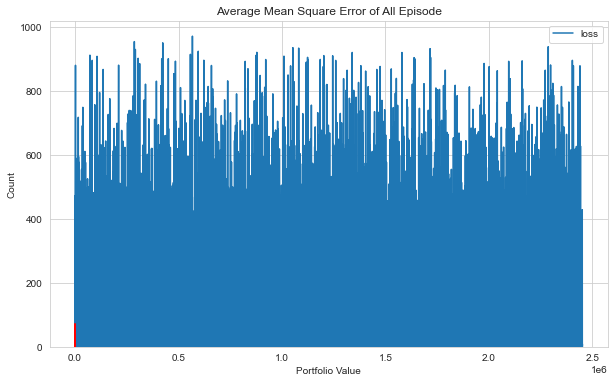

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

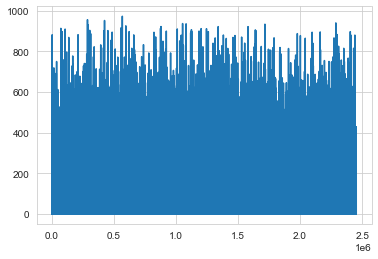

In [5]:
plt.plot(agent.model.losses)

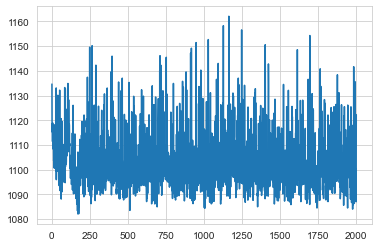

In [6]:
plt.plot(portfolio_value)

episode end value: 978.37, duration: 0:00:00.090021
Sell: 249 times, Buy: 236 times


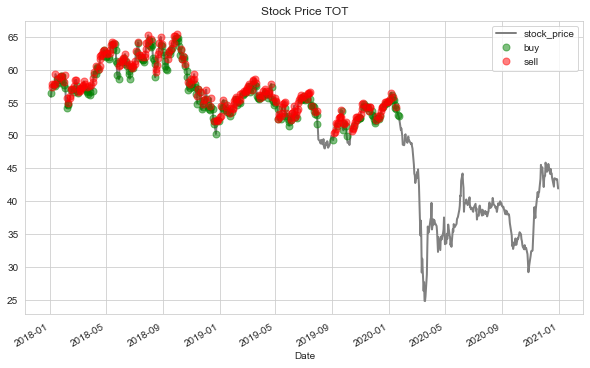

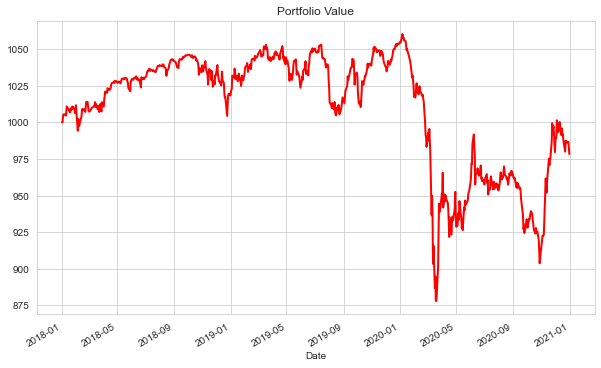

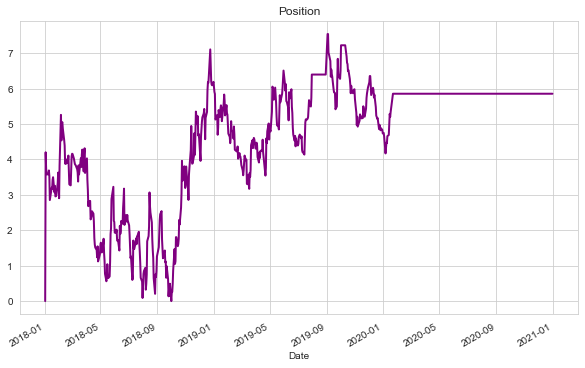

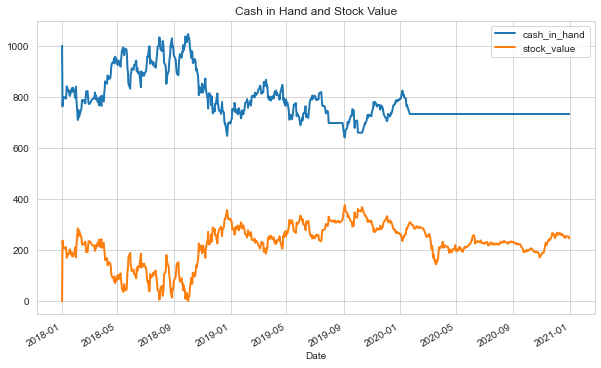

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: TOT
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -0.73 %
Volatility: 0.0826
shape ratio: -0.2211
Maximun drawdown: -17.20 %
Calmar ratio: -0.0422
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -9.14 %
Volatility (benchmark): 0.3707
shape ratio: -0.2762
Maximun drawdown: -62.16 %
Calmar ratio (benchmark): -0.1470


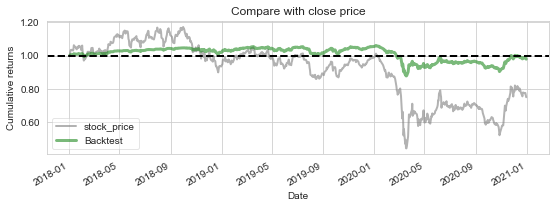

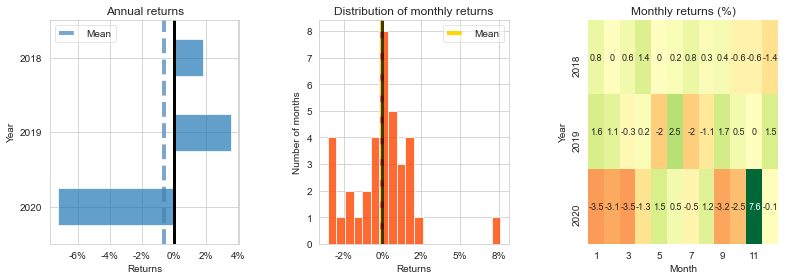

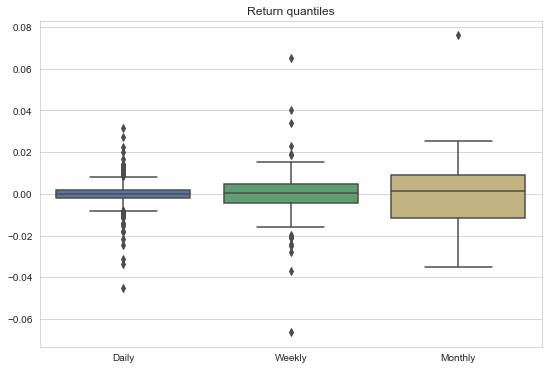

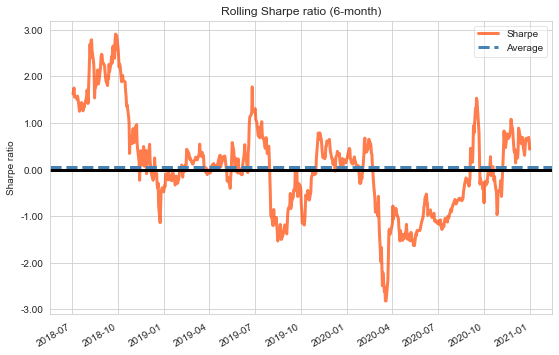

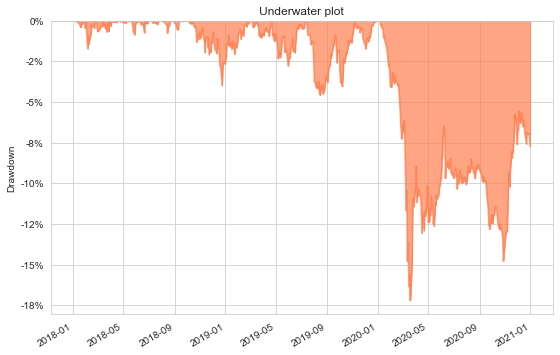

In [11]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')